In [ ]:
import numpy as np
import keras
import keras.backend as K
from keras.layers import Input, Dense, Activation, LeakyReLU, BatchNormalization
from keras.models import Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()


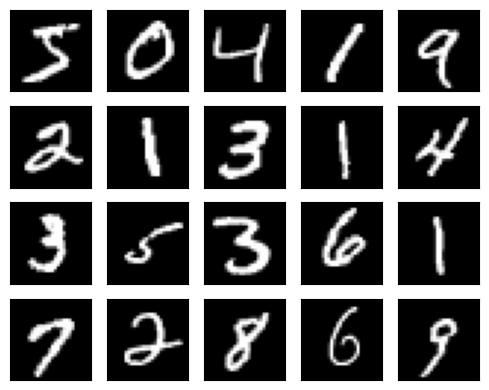

In [ ]:
plt.figure(figsize=(5, 4))
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(X_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

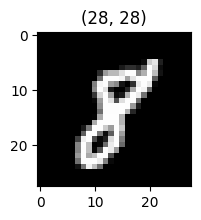

In [ ]:
sample = X_train[17]

plt.figure(figsize=(3, 2))
plt.title(sample.shape)
plt.imshow(sample, cmap='gray')
plt.show()

In [ ]:
X_train.min(), X_train.max()


(0, 255)

In [ ]:
def make_latent_samples(n_samples, sample_size):
    #return np.random.uniform(-1, 1, size=(n_samples, sample_size))
    return np.random.normal(loc=0, scale=1, size=(n_samples, sample_size))

In [ ]:
make_latent_samples(1, 100)


array([[-0.89261871, -1.18136446, -0.12337172, -1.63106194,  0.82273957,
        -1.25130534,  1.29086699, -0.97456382, -0.02534977,  1.37829499,
         0.58725352,  0.24984385, -0.31865926,  0.94782639,  0.07442425,
         1.38360308, -0.77238454, -1.47686922,  1.88780091,  1.2208223 ,
        -1.21406379, -0.70058679,  1.07275979, -1.57930448, -0.02359604,
         1.75237761,  0.13490932, -0.20326932,  1.55254747,  0.09171921,
        -0.85400426, -0.92740108, -0.6067357 , -0.58974716,  3.07724774,
        -0.79036849, -2.19289528, -0.26459412,  0.3300458 ,  0.36757912,
         0.5939876 , -0.46084159, -0.32684631, -0.16373369,  0.0232038 ,
        -0.52280233,  1.18594916, -0.72085996,  1.50483741,  0.19317412,
        -2.10657664, -0.24095328,  0.52113975, -1.04926246,  1.82384039,
         0.34393391,  0.62967637,  1.17431925, -0.52390579,  0.57963389,
        -0.23046702,  0.35410864, -0.81192047, -0.36352569,  0.55335388,
        -0.873992  , -0.52969124,  1.25705263,  1.4

In [ ]:
generator = Sequential([
    Dense(128, input_shape=(100,)),
    LeakyReLU(alpha=0.01),
    Dense(784),
    Activation('tanh')
], name='generator')

generator.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


Model: "generator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_14 (Dense)                     │ (None, 128)                 │          12,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_10 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 784)                 │         101,136 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 784)                 │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 114,064 (445.56 KB)

 Trainable params: 114,064 (445.56 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
discriminator = Sequential([
    Dense(128, input_shape=(784,)),
    LeakyReLU(alpha=0.01),
    Dense(1),
    Activation('sigmoid')
], name='discriminator')

discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# maintain the same shared weights with the generator and the discriminator.
gan = Sequential([
    generator,
    discriminator
])

gan.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ generator (Sequential)               │ (None, 784)                 │         114,064 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ discriminator (Sequential)           │ (None, 1)                   │         100,609 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 214,673 (838.57 KB)

 Trainable params: 214,673 (838.57 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def make_trainable(model, trainable):
    for layer in model.layers:
        layer.trainable = trainable

In [ ]:
make_trainable(discriminator, True)
discriminator.summary()

Model: "discriminator"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_11 (LeakyReLU)           │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 1)                   │             129 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 1)                   │               0 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 100,609 (393.00 KB)

 Trainable params: 100,609 (393.00 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
def make_simple_GAN(sample_size,
                    g_hidden_size,
                    d_hidden_size,
                    leaky_alpha,
                    g_learning_rate,
                    d_learning_rate):
    K.clear_session()

    generator = Sequential([
        Dense(g_hidden_size, input_shape=(sample_size,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(784),
        Activation('tanh')
    ], name='generator')

    discriminator = Sequential([
        Dense(d_hidden_size, input_shape=(784,)),
        LeakyReLU(alpha=leaky_alpha),
        Dense(1),
        Activation('sigmoid')
    ], name='discriminator')

    gan = Sequential([
        generator,
        discriminator
    ])

    discriminator.compile(optimizer=Adam(learning_rate=d_learning_rate), loss='binary_crossentropy')
    gan.compile(optimizer=Adam(learning_rate=g_learning_rate), loss='binary_crossentropy')

    return gan, generator, discriminator



In [ ]:
def preprocess(x):
    x = x.reshape(-1, 784) # 784=28*28
    x = np.float64(x)
    x = (x / 255 - 0.5) * 2
    x = np.clip(x, -1, 1)
    return x
X_train_real = preprocess(X_train)
X_test_real  = preprocess(X_test)

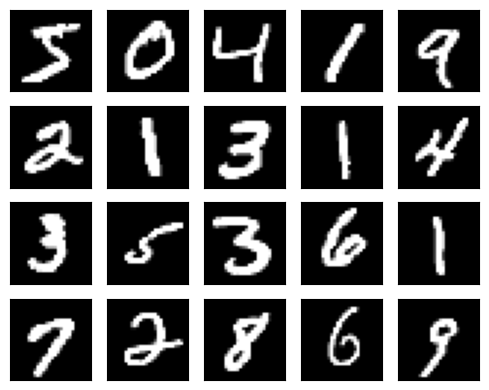

In [ ]:
def deprocess(x):
    x = (x / 2 + 1) * 255
    x = np.clip(x, 0, 255)
    x = np.uint8(x)
    x = x.reshape(28, 28)
    return x
plt.figure(figsize=(5, 4))
for i in range(20):
    img = deprocess(X_train_real[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()

In [ ]:
def make_labels(size):
    return np.ones([size, 1]), np.zeros([size, 1])

In [ ]:
y_real_10, y_fake_10 = make_labels(10)

y_real_10, y_fake_10

(array([[1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.],
        [1.]]),
 array([[0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.],
        [0.]]))

In [ ]:
sample_size     = 4
g_hidden_size   = 4
d_hidden_size   = 4
leaky_alpha     = 0.01
g_learning_rate = 0.01
d_learning_rate = 0.02
epochs          = 3
batch_size      = 4
eval_size       = 4
smooth          = 0.1


subset_size = 300  # Train on a small subset of data
X_train_real = X_train_real[:subset_size]
X_test_real = X_test_real[:subset_size]

y_train_real, y_train_fake = make_labels(batch_size)
y_eval_real,  y_eval_fake  = make_labels(eval_size)

gan, generator, discriminator = make_simple_GAN(
    sample_size,
    g_hidden_size,
    d_hidden_size,
    leaky_alpha,
    g_learning_rate,
    d_learning_rate)

losses = []
for e in range(epochs):
    for i in range(len(X_train_real)//batch_size):
        # real MNIST digit images
        X_batch_real = X_train_real[i*batch_size:(i+1)*batch_size]

        latent_samples = make_latent_samples(batch_size, sample_size)
        X_batch_fake = generator.predict_on_batch(latent_samples)

        make_trainable(discriminator, True)
        discriminator.train_on_batch(X_batch_real, y_train_real * (1 - smooth))
        discriminator.train_on_batch(X_batch_fake, y_train_fake)

        make_trainable(discriminator, False)
        gan.train_on_batch(latent_samples, y_train_real)

    X_eval_real = X_test_real[np.random.choice(len(X_test_real), eval_size, replace=False)]

    latent_samples = make_latent_samples(eval_size, sample_size)
    X_eval_fake = generator.predict_on_batch(latent_samples)

    d_loss_real = discriminator.test_on_batch(X_eval_real, y_eval_real)
    d_loss_fake = discriminator.test_on_batch(X_eval_fake, y_eval_fake)
    d_loss = d_loss_real + d_loss_fake

    g_loss = gan.test_on_batch(latent_samples, y_eval_real)



    losses.append((d_loss, g_loss))




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step


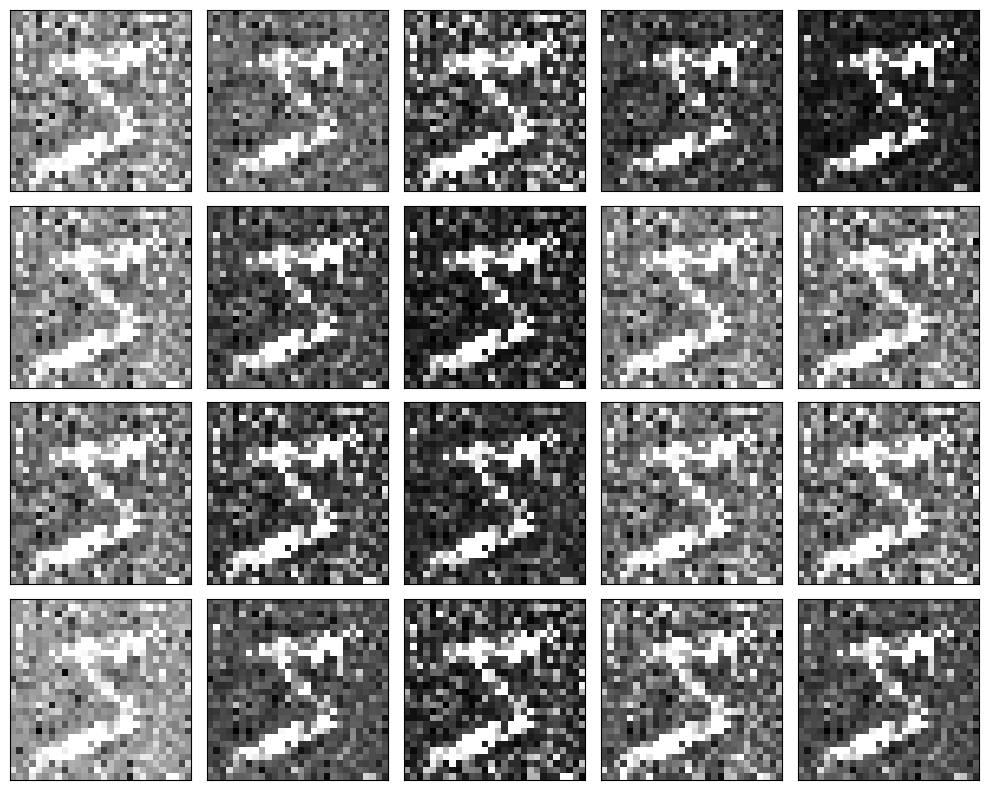

In [ ]:
latent_samples = make_latent_samples(20, sample_size)
generated_digits = generator.predict(latent_samples)

plt.figure(figsize=(10, 8))
for i in range(20):
    img = deprocess(generated_digits[i])
    plt.subplot(4, 5, i+1)
    plt.imshow(img, cmap='gray')
    plt.xticks([])
    plt.yticks([])
plt.tight_layout()
plt.show()